# 1090

In [128]:
import pandas as pd
import glob
import numpy as np

path = '/Users/beautifulmonster/Desktop/FL/processeddata/processeddata_1090/Train' # use your path
all_files = glob.glob(path + "/*.txt")

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [77]:
li = []
for filename in all_files:
    df = pd.read_csv(filename, sep=',',names= ['per_time','per_cost','weekday','morning','evening','route'])
    df['client_id'] = filename.split('/')[8].split('.')[0].strip('Train')
    li.append(df)

frame = pd.concat(li, axis = 0, ignore_index=True)

In [87]:
frame.head()

,per_time,per_cost,weekday,morning,evening,route,client_id
0,1.299831,0.545460,1,0,0,0,27441
1,0.934172,2.163665,1,0,0,0,27441
2,1.439570,0.526959,0,0,0,0,27441
3,0.935442,1.248306,0,0,0,0,27441
4,0.899299,1.713152,0,0,0,0,27441


In [122]:
# number of clients
len(frame['client_id'].unique())

20278

In [83]:
# dtype of each column
frame.dtypes

per_time     float64
per_cost     float64
weekday        int64
morning        int64
evening        int64
route          int64
client_id     object
dtype: object

In [11]:
# number of total data
len(frame)

2324285

In [69]:
#frame[['weekday','morning','evening','route']] = frame[['weekday','morning','evening','route']].astype('category')

## Distribution

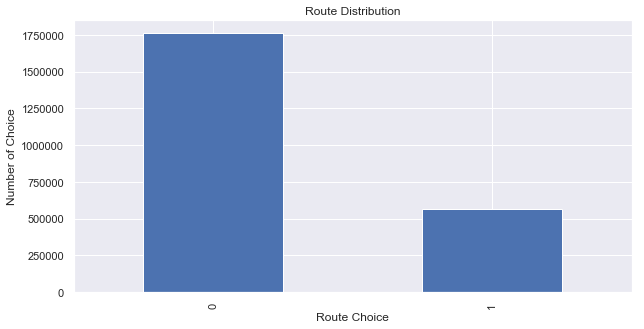

In [85]:
frame['route'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Route Distribution')
plt.xlabel('Route Choice')
plt.ylabel('Number of Choice');

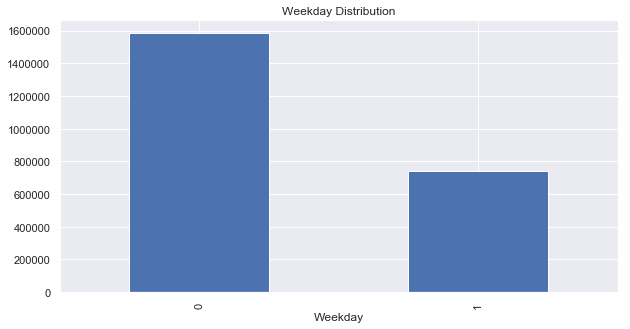

In [86]:
frame['weekday'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Weekday Distribution')
plt.xlabel('Weekday');

Users use the application mainly on Weekend; People barely uses GPS for their daily route

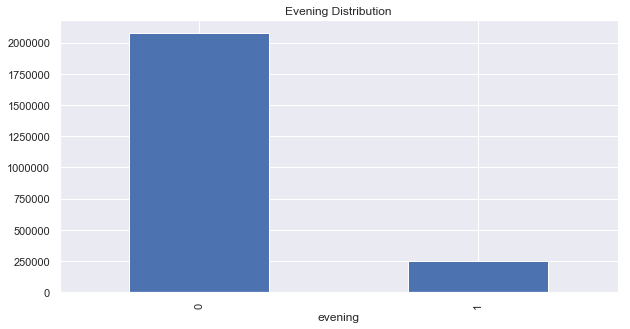

In [88]:
frame['evening'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Evening Distribution')
plt.xlabel('evening');

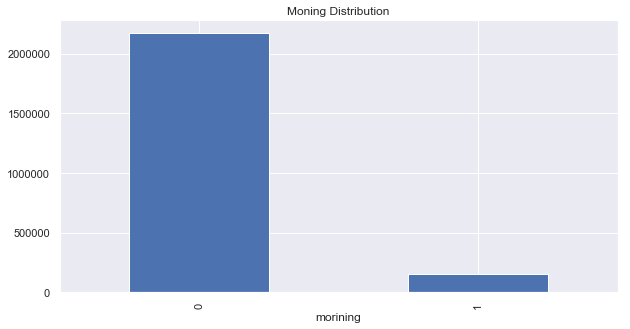

In [90]:
frame['morning'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Moning Distribution')
plt.xlabel('morining');

In [126]:
frame_1 = frame.copy()

In [141]:
frame_1['peak_time'] = np.where((frame['morning'] == 0) & (frame_1['evening'] == 0), 0, 1)

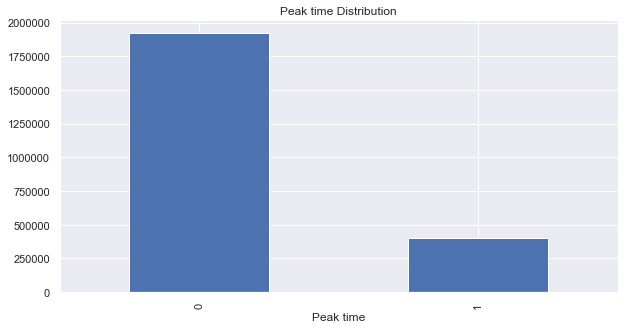

In [142]:
frame_1['peak_time'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Peak time Distribution')
plt.xlabel('Peak time');

People are more likely to use alternative route on not-peak time

In [112]:
# Usage on non-peak time
len(frame.loc[(frame['morning'] == 0) & (frame['evening'] == 0)])

1919799

In [114]:
# Usage on one of peak time
len(frame) - len(frame.loc[(frame['morning'] == 0) & (frame['evening'] == 0)])

404486

In [35]:
print(df.isnull().sum())

per_time     0
per_cost     0
weekday      0
morning      0
evening      0
route        0
client_id    0
dtype: int64


## Outlier

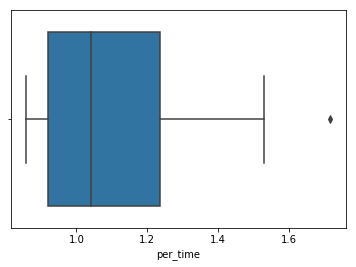

In [39]:
sns.boxplot(x=df['per_time'])

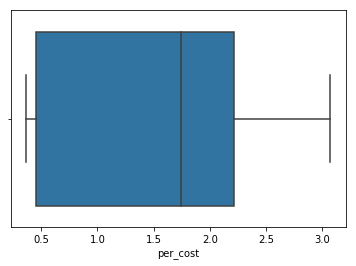

In [40]:
sns.boxplot(x=df['per_cost'])

## The Number of Dataset Per Client

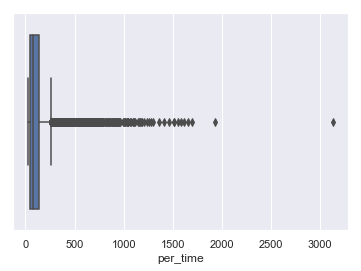

In [119]:
sns.boxplot(x=frame.groupby('client_id').count()['per_time'])

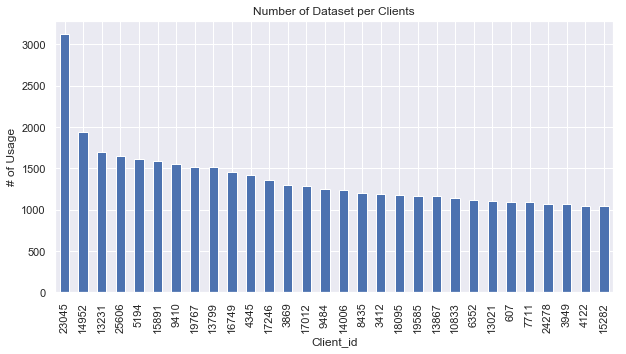

In [118]:
frame.groupby('client_id').count()['per_time'].nlargest(30).plot(kind='bar', figsize=(10,5))
plt.title('Number of Dataset per Clients')
plt.ylabel('# of Usage')
plt.xlabel('Client_id');

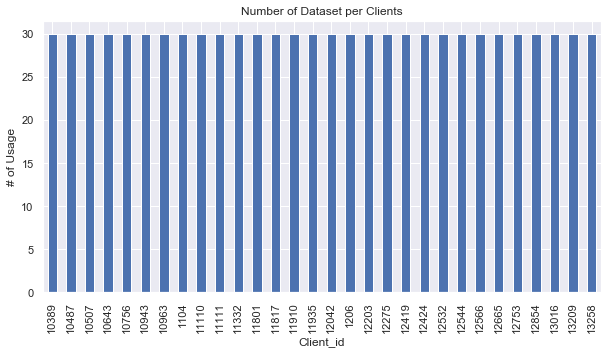

In [120]:
frame.groupby('client_id').count()['per_time'].nsmallest(30).plot(kind='bar', figsize=(10,5))
plt.title('Number of Dataset per Clients')
plt.ylabel('# of Usage')
plt.xlabel('Client_id');

In [148]:
frame.groupby('client_id').count()['per_time']

client_id
0         50
1         33
10        33
1000     212
10000     49
        ... 
9994      55
9995     509
9996      76
9997      75
9999      57
Name: per_time, Length: 20278, dtype: int64

## Heat Map

,per_time,per_cost,weekday,morning,evening,route
per_time,1.000000,-0.640092,-0.011999,0.010271,0.021391,0.088376
per_cost,-0.640092,1.000000,-0.012777,-0.006991,-0.000457,-0.221582
weekday,-0.011999,-0.012777,1.000000,-0.182435,-0.237570,-0.008757
morning,0.010271,-0.006991,-0.182435,1.000000,-0.092617,0.006931
evening,0.021391,-0.000457,-0.237570,-0.092617,1.000000,0.003784
route,0.088376,-0.221582,-0.008757,0.006931,0.003784,1.000000


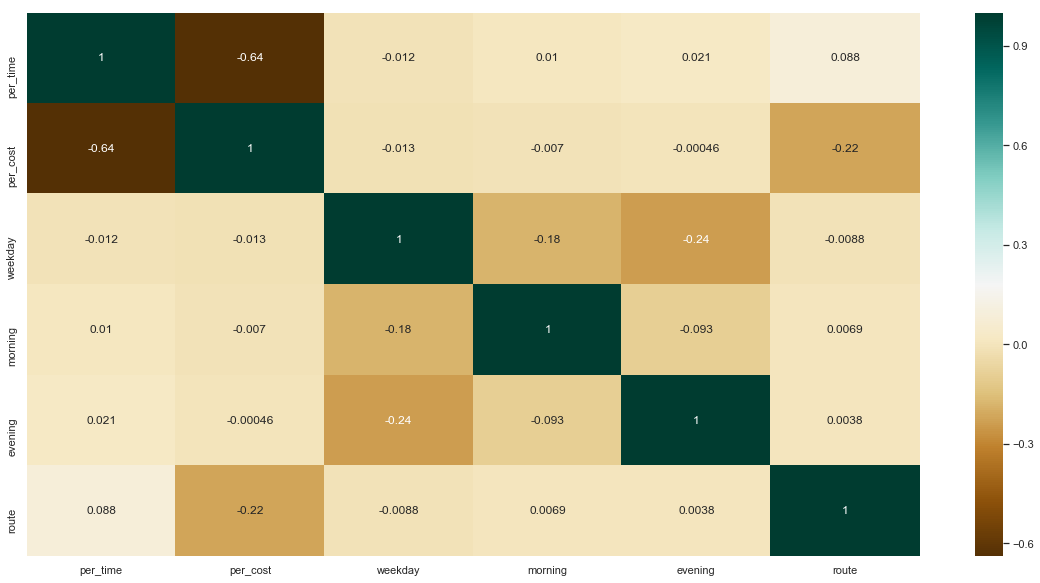

In [78]:
# relations between the variables.
plt.figure(figsize=(20,10))
c= frame.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

Most variables are independent  
Route depends mainly on per_cost;
Per_cost & Per_time: negative correation; trade off cost and fastest route but not necessarily?

## Further implementation: Feature Importance

- **Better understanding of Data**: score which features are the most relevant to the target; which/different data should be more collected/gathered
- **Better understanding of Model**: Most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction. This is a type of model interpretation that can be performed for those models that support it.
- **Feautre selection**: reduce the number of features; reduce computational cost, avoiding multicollinearity. Sometimes improve model performance

### Coefficient as Feature Importance
set of coefficients to use in the weighted sum in order to make a prediction. These coefficients can be used directly as a crude type of feature importance score.

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [151]:
frame.head()

,per_time,per_cost,weekday,morning,evening,route,client_id
0,1.299831,0.545460,1,0,0,0,27441
1,0.934172,2.163665,1,0,0,0,27441
2,1.439570,0.526959,0,0,0,0,27441
3,0.935442,1.248306,0,0,0,0,27441
4,0.899299,1.713152,0,0,0,0,27441


#### Linear Regression

In [169]:
# predictors and label
X = frame_1[['per_time','per_cost','weekday','morning','evening']]
y = frame_1['route']

[-0.19623645 -0.20987778 -0.01099569  0.006923    0.00434284]
Feature: 0, Score: -0.19624
Feature: 1, Score: -0.20988
Feature: 2, Score: -0.01100
Feature: 3, Score: 0.00692
Feature: 4, Score: 0.00434


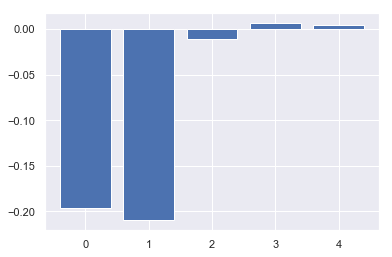

In [171]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Logistic

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Feature: 0, Score: -1.76044
Feature: 1, Score: -1.88350
Feature: 2, Score: -0.07030
Feature: 3, Score: 0.02800
Feature: 4, Score: -0.00163


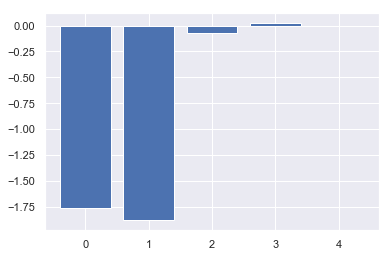

In [174]:
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()